# Session 13 🐍

☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️☀️

***

# 83. Collection of data
A collection of data can be stored in a tuple, list, set, or dictionary. The difference between using one or the other will depend on the properties you need to represent your data. In the following table, we briefly present the properties of each of these collections.

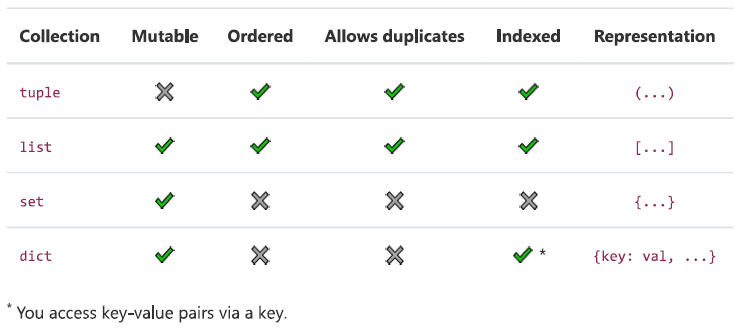

***

# 84. Iterables and Iterators
What collections of data have in common is that they are iterable. An **iterable** is any collection that you can step through one by one. To traverse an iterable you require an **iterator**. An iterator is an object that traverses your iterable and returns one element at a time. To transform a collection into an iterator, we use the **iter()** method. Afterwards, each element in the iterator can be accessed by repeatedly calling the **next()** method.

***

## 84-1. Iterables
An iterable is any Python object capable of returning its elements one at a time in a loop.

Common iterables: Lists, tuples, strings, dictionaries, sets, files.

They can be looped over using for loops.

In [8]:
numbers = [1, 2, 3]  
for num in numbers:
    print(num)  

1
2
3


***

## 84-2. Iterator
An iterator is an object that:
- Remembers its state during iteration.
- Produces the next value when next() is called.
- Raises **StopIteration** when no more items are left.

In [1]:
numbers = [1, 2, 3]
iterator = iter(numbers)  # Get iterator

print(next(iterator))  
print(next(iterator))  
print(next(iterator))  
print(next(iterator))  # Raises StopIteration (no more items)

1
2
3


StopIteration: 

***

## 84-3. Practical Applications
- Memory Efficiency: Iterators process data lazily (e.g., reading large files line by line).
- Custom Sequences: Build objects that behave like built-in iterables (e.g., range).
- Generators: A simpler way to create iterators using **yield**.

In [3]:
def fibonacci():
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a + b

# Only computes values as needed
fib = fibonacci()
print(next(fib))  
print(next(fib))  
print(next(fib))    

0
1
1


***

# 85. yield
yield turns a function into a **generator**, which produces values one at a time (lazily) instead of all at once.

When yield is called, the function pauses and saves its state.

On the next **next()** call, it resumes where it left off.

For **Memory Efficiency**. Great for large/infinite data (e.g., reading files).

In [7]:
def count_up_to(n):
    num = 1
    while num <= n:
        yield num  # Pauses here
        num += 1

for num in count_up_to(3):
    print(num) 

1
2
3


***

# 86. Comprehensions 
Comprehensions are a concise and readable way to create lists, dictionaries, sets, and generators in Python. They replace traditional loops with a single line of code, making your code cleaner and faster.

***

## 86-1. List Comprehension
Creates a new list by applying an expression to each item in an iterable (e.g., list, range).

Syntax:

new_list = [expression **for** item **in** iterable **if** condition]

In [10]:
numbers = [1, 2, 3, 4]
squares = [x ** 2 for x in numbers]
print(squares)  

[1, 4, 9, 16]


In [11]:
evens = [x for x in range(10) if x % 2 == 0]
print(evens) 

[0, 2, 4, 6, 8]


In [12]:
pairs = [(x, y) for x in [1, 2] for y in ['a', 'b']]
print(pairs)  

[(1, 'a'), (1, 'b'), (2, 'a'), (2, 'b')]


***

## 86-2. Dictionary Comprehension
Creates a dictionary from an iterable with key-value pairs.

Syntax:

new_dict = {key_expr: value_expr **for** item **in** iterable **if** condition}

In [13]:
squares = {x: x ** 2 for x in range(5)}
print(squares)  

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}


In [14]:
even_squares = {x: x ** 2 for x in range(10) if x % 2 == 0}
print(even_squares)   

{0: 0, 2: 4, 4: 16, 6: 36, 8: 64}


***

## 86-3. Set Comprehension
Creates a unique unordered collection (no duplicates).

Syntax:

new_set = {expression **for** item **in** iterable **if** condition}

In [15]:
numbers = [1, 2, 2, 3, 4, 4]
unique_squares = {x ** 2 for x in numbers}
print(unique_squares)  

{16, 1, 4, 9}


In [17]:
nums = {x for x in range(6) if x >= 3}
print(nums)

{3, 4, 5}


***

## 86-4. Generator Comprehension
Creates a memory-efficient iterator (doesn’t store all values at once).

Syntax:

new_gen = (expression **for** item **in** iterable **if** condition)

In [18]:
squares_gen = (x ** 2 for x in range(10))
for num in squares_gen:
    print(num, end = " ")  

0 1 4 9 16 25 36 49 64 81 

In [28]:
nums = {2, 33, 53, 11, 4, 9, 8, 1}
new_nums = (x for x in nums if x < 10)
for num in new_nums:
    print(num, end = " ")

2 1 4 8 9 

***

## All in one:

In [29]:
numbers = [1, 2, 3, 4, 4, 5]

# List Comprehension
squares = [x ** 2 for x in numbers]

# Dictionary Comprehension
square_dict = {x: x ** 2 for x in numbers}

# Set Comprehension
unique_squares = {x ** 2 for x in numbers}

# Generator Comprehension
square_gen = (x ** 2 for x in numbers)

print(squares)
print(square_dict)
print(unique_squares)
print(square_gen) # Needs a for loop

[1, 4, 9, 16, 16, 25]
{1: 1, 2: 4, 3: 9, 4: 16, 5: 25}
{1, 4, 9, 16, 25}
<generator object <genexpr> at 0x000001F8D03B5900>


***

## 86-5. Nested Comprehension
In a nested comprehension, the inner comprehension is **completely evaluated and stored** before it is being used in the outer comprehension,

In [30]:
nums = [sq for sq in [n * n for n in range(10)] if sq % 7 > 2]
print(nums)

[4, 25, 81]


An alternative approach for the above, with a disadvantage of every transformation being done twice, which can be costly if the transformation is expensive.

In [31]:
nums = [n * n for n in range(10) if n * n % 7 > 2]
print(nums)

[4, 25, 81]


***

## 86-6. Complex Comprehension

In [33]:
composites = [i * j for i in range(2, 10+1) for j in range(2, 100// i+1)]
print(composites)

[4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 18, 27, 36, 45, 54, 63, 72, 81, 90, 99, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [35]:
composites = {i * j for i in range(2, 10+1) for j in range(2, 100// i+1)}
print(composites)

{4, 6, 8, 9, 10, 12, 14, 15, 16, 18, 20, 21, 22, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 38, 39, 40, 42, 44, 45, 46, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 60, 62, 63, 64, 65, 66, 68, 69, 70, 72, 74, 75, 76, 77, 78, 80, 81, 82, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100}


In [37]:
pwr_list = [base ** exp for base in range(2, 10+1) if base not in composites for exp in range(2, 5+1)]
print(pwr_list)

[4, 8, 16, 32, 9, 27, 81, 243, 25, 125, 625, 3125, 49, 343, 2401, 16807]


In [43]:
def trail(n):
    print('-', end = '')
    return n

[trail(n * n) for n in range(20) if n % 7 > 2]

-----------

[9, 16, 25, 36, 100, 121, 144, 169, 289, 324, 361]

***

***

# Some Excercises

**1.** Given a list of numbers [1, 2, 3, 4, 5], use a list comprehension to create a new list where each number is squared.

___

**2.** Given a dictionary {'a': 1, 'b': 2, 'c': 3, 'd': 4}, create a new dictionary with only key-value pairs where the value is even.

---

**3.** From a list of words ["apple", "banana", "cherry", "apple", "banana"], create a set of words that start with 'a'.

---

**4.**  Create a generator that yields even numbers from 0 to 10 (inclusive) without storing them in memory.

***

**5.** Transpose the matrix [[1, 2, 3], [4, 5, 6], [7, 8, 9]] using nested comprehensions.

***

**6.** Given two lists keys = ['a', 'b', 'c'] and values = [1, 2, 3], create a dictionary where each key-value pair is {key: value * 2} only if the value is greater than 1.

***

**7.** Write a generator function countdown(n) that yields numbers from n to 1, then prints "Done!".

***

**8.** Given a nested list [[1, 2, 3], [4, 5, 6], [7, 8, 9]], flatten it and keep only odd numbers using a single comprehension.

***

**9.** Merge list1 = ['a', 'b', 'c'] and list2 = [1, 2, 3] into a dictionary where values are doubled if the key is a vowel.

***

#                                                        🌞 https://github.com/AI-Planet 🌞